In [2]:
import pickle
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-3])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items
import util.scraper as scraper

/home/makoa/School/osrs_research
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/makoa/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/home/makoa/.local/lib/python3.6/site-packages/IPython/extensions', '/home/makoa/.ipython', '/home/makoa/School/osrs_research']


In [4]:
with open('all.pickle','rb') as f:
    results = pickle.load(f)

In [5]:
len(results)

2115

In [6]:
results['Abyssal_whip'].keys()

dict_keys(['sma', 'buyAndHold', 'startMAE', 'predictions', 'persist', 'endMAE', 'sma_model', 'stochOscil', 'numPrices', 'budget', 'momentum_model', 'testPrices', 'momentum', 'endLoss', 'numEpochs', 'startLoss', 'model_opt', 'perfect', 'opt_params', 'item', 'model', 'stochOscil_model'])

In [7]:
sma = [(item,results[item]['sma']) for item in results]
sma = sorted(sma, key=lambda x: x[1], reverse=True)

sma_model = [(item,results[item]['sma_model']) for item in results]
sma_model = sorted(sma_model, key=lambda x: x[1], reverse=True)

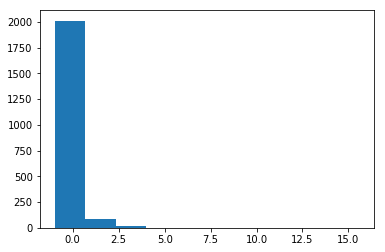

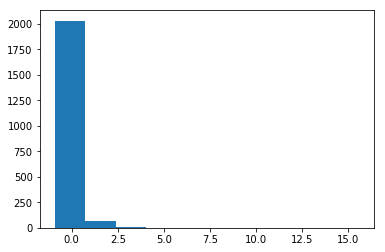

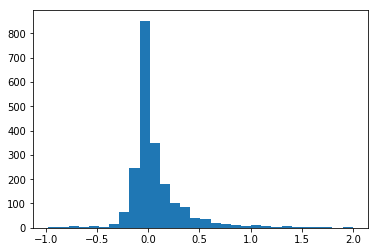

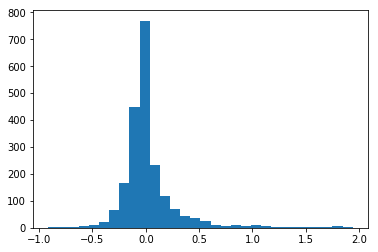

In [8]:
plt.hist([a[1] for a in sma])
plt.show()
plt.hist([a[1] for a in sma_model])
plt.show()
plt.hist([a[1] for a in sma if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in sma_model if a[1]>-2 and a[1]<2],30)
plt.show()

In [9]:
numSMA = len([a for a in sma if a[1]>0])
numSMA_model = len([a for a in sma_model if a[1]>0])

In [10]:
print(len(results))
print(numSMA/len(results))
print(numSMA_model/len(results))

2115
0.4690307328605201
0.3650118203309693


In [11]:
stochOscil = [(item,results[item]['stochOscil']) for item in results]
stochOscil = sorted(stochOscil, key=lambda x: x[1], reverse=True)

stochOscil_model = [(item,results[item]['stochOscil_model']) for item in results]
stochOscil_model = sorted(stochOscil_model, key=lambda x: x[1], reverse=True)

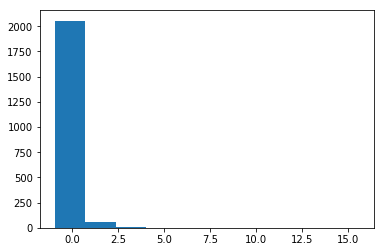

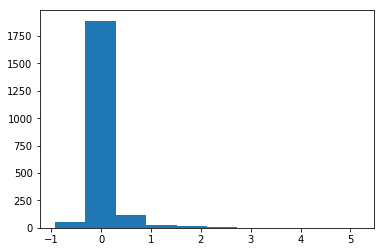

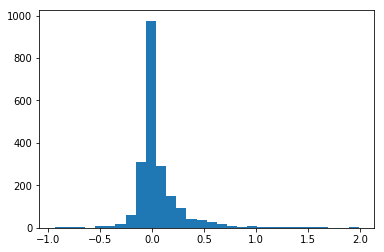

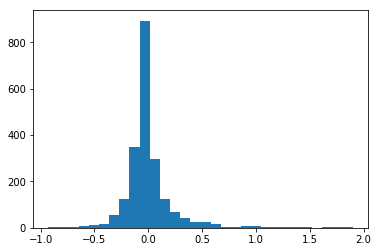

In [12]:
plt.hist([a[1] for a in stochOscil])
plt.show()
plt.hist([a[1] for a in stochOscil_model])
plt.show()
plt.hist([a[1] for a in stochOscil if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in stochOscil_model if a[1]>-2 and a[1]<2],30)
plt.show()

In [13]:
numstochOscil = len([a for a in stochOscil if a[1]>0])
numstochOscil_model = len([a for a in stochOscil_model if a[1]>0])

In [14]:
print(len(results))
print(numstochOscil/len(results))
print(numstochOscil_model/len(results))

2115
0.43829787234042555
0.35224586288416077


In [15]:
momentum = [(item,results[item]['momentum']) for item in results]
momentum = sorted(momentum, key=lambda x: x[1], reverse=True)

momentum_model = [(item,results[item]['momentum_model']) for item in results]
momentum_model = sorted(momentum_model, key=lambda x: x[1], reverse=True)

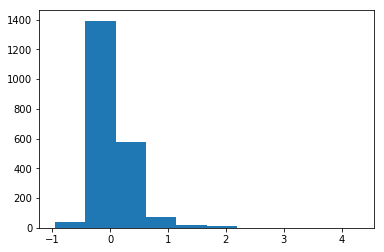

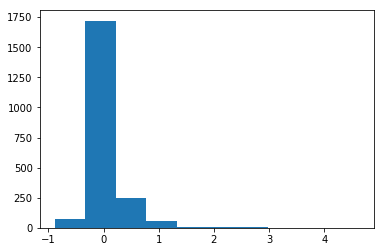

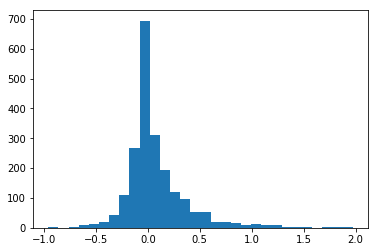

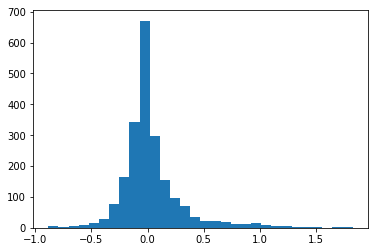

In [16]:
plt.hist([a[1] for a in momentum])
plt.show()
plt.hist([a[1] for a in momentum_model])
plt.show()
plt.hist([a[1] for a in momentum if a[1]>-2 and a[1]<2],30)
plt.show()
plt.hist([a[1] for a in momentum_model if a[1]>-2 and a[1]<2],30)
plt.show()

In [17]:
nummomentum = len([a for a in momentum if a[1]>0])
nummomentum_model = len([a for a in momentum_model if a[1]>0])

In [18]:
print(len(results))
print(nummomentum/len(results))
print(nummomentum_model/len(results))

2115
0.4973995271867612
0.4203309692671395


In [23]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['sma'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [24]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.01031947285835006
bl,price -0.05144175220748757
prof,pers 0.4567852026068886
profs,perf -0.05298090256642992
profs,bah 0.5098113258748539
profdiff,mae 0.06058094731635594
prices,mae -0.0030459703689468304
profs,mae -0.20743102239132724
profdiff,mae 0.06058094731635594


In [25]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['sma_model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [26]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.00732643183659766
bl,price -0.05144175220748757
prof,pers 0.41598475990184425
profs,perf -0.04060136425042006
profs,bah 0.6077509808001492
profdiff,mae 0.06058094731635594
prices,mae -0.0030459703689468304
profs,mae -0.19470096660571182
profdiff,mae 0.06058094731635594


In [28]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['stochOscil'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [29]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.0042006912892923465
bl,price -0.05144175220748757
prof,pers 0.2836211896224955
profs,perf -0.022114073602726457
profs,bah 0.5169177695632167
profdiff,mae 0.06058094731635594
prices,mae -0.0030459703689468304
profs,mae -0.14348135358212954
profdiff,mae 0.06058094731635594


In [30]:
prices = [items.getPrices(item)[-1] for item in results]
buylimits = [int(items.getInfo(item)['buyLimit']) for item in results]
profs = [results[item]['stochOscil_model'] for item in results]
pers = [results[item]['persist'] for item in results]
perf = [results[item]['perfect'] for item in results]
bah = [results[item]['buyAndHold'] for item in results]
mae = [results[item]['endMAE'] for item in results]
prof_perf_diff = [abs(results[item]['perfect'] - results[item]['model']) for item in results]

In [31]:
print('price,profs',np.corrcoef(prices,profs)[0][1])
print('bl,price',np.corrcoef(buylimits,prices)[0][1])
print('prof,pers',np.corrcoef(profs,pers)[0][1])
print('profs,perf',np.corrcoef(profs,perf)[0][1])
print('profs,bah',np.corrcoef(profs,bah)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])
print('prices,mae',np.corrcoef(prices,mae)[0][1])
print('profs,mae',np.corrcoef(profs,mae)[0][1])
print('profdiff,mae',np.corrcoef(prof_perf_diff,mae)[0][1])

price,profs -0.0024297701692270537
bl,price -0.05144175220748757
prof,pers 0.18297078940044606
profs,perf -0.005969369113352325
profs,bah 0.6047478974520879
profdiff,mae 0.06058094731635594
prices,mae -0.0030459703689468304
profs,mae -0.13355364030901373
profdiff,mae 0.06058094731635594
